In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [68]:
data_1mc = pd.read_csv('HDF_calckWh_10000826638_26-02-2025.csv')
data_olr = pd.read_csv('HDF_calckWh_10000847339_26-02-2025.csv')

In [ ]:
data_1mc['Date'] = pd.to_datetime(data_olr['Read Date and End Time'], dayfirst=True)
data_1mc.groupby(['Read Type',pd.Grouper(key='Date', freq='1D')]).sum().reset_index()
grouped_data_1mc = data_1mc.groupby(['Read Type',pd.Grouper(key='Date', freq='1D')]).sum().reset_index()
export_data_1mc = grouped_data_1mc[grouped_data_1mc['Read Type'] == 'Active Export Interval (kWh)']


In [ ]:
pd.options.mode.copy_on_write = True
data_1mc['Date'] = pd.to_datetime(data_1mc['Read Date and End Time'], dayfirst=True)
grouped_data_1mc = data_1mc.groupby(['Read Type',pd.Grouper(key='Date', freq='1D')]).sum().reset_index()
export_data_1mc = grouped_data_1mc[grouped_data_1mc['Read Type'] == 'Active Export Interval (kWh)']

export_data_1mc['Date'] = mdates.num2date(mdates.date2num(export_data_1mc['Date']))

In [ ]:
export_data_1mc

,Read Type,Date,MPRN,Meter Serial Number,Read Value,Read Date and End Time
0,Active Export Interval (kWh),2024-01-10 00:00:00+00:00,460038025348,1022615374,0.000,10-01-2024 23:3010-01-2024 23:0010-01-2024 22:...
1,Active Export Interval (kWh),2024-01-11 00:00:00+00:00,480039678624,1067076912,0.000,11-01-2024 23:3011-01-2024 23:0011-01-2024 22:...
2,Active Export Interval (kWh),2024-01-12 00:00:00+00:00,480039678624,1067076912,0.000,12-01-2024 23:3012-01-2024 23:0012-01-2024 22:...
3,Active Export Interval (kWh),2024-01-13 00:00:00+00:00,480039678624,1067076912,0.000,13-01-2024 23:3013-01-2024 23:0013-01-2024 22:...
4,Active Export Interval (kWh),2024-01-14 00:00:00+00:00,480039678624,1067076912,0.000,14-01-2024 23:3014-01-2024 23:0014-01-2024 22:...
...,...,...,...,...,...,...
401,Active Export Interval (kWh),2025-02-21 00:00:00+00:00,480039678624,1067076912,6.563,21-02-2025 23:3021-02-2025 23:0021-02-2025 22:...
402,Active Export Interval (kWh),2025-02-22 00:00:00+00:00,480039678624,1067076912,11.160,22-02-2025 23:3022-02-2025 23:0022-02-2025 22:...
403,Active Export Interval (kWh),2025-02-23 00:00:00+00:00,480039678624,1067076912,3.451,23-02-2025 23:3023-02-2025 23:0023-02-2025 22:...
404,Active Export Interval (kWh),2025-02-24 00:00:00+00:00,480039678624,1067076912,9.997,24-02-2025 23:3024-02-2025 23:0024-02-2025 22:...


In [ ]:
data_olr['Date'] = pd.to_datetime(data_olr['Read Date and End Time'], dayfirst=True)
grouped_data_olr = data_olr.groupby(['Read Type',pd.Grouper(key='Date', freq='1D')]).sum().reset_index()
active_export_olr = grouped_data_olr[grouped_data_olr['Read Type'] == 'Active Export Interval (kWh)']

active_export_olr

,Read Type,Date,MPRN,Meter Serial Number,Read Value,Read Date and End Time
0,Active Export Interval (kWh),2024-01-10,460038977594,1571066244,0.0000,10-01-2024 23:3010-01-2024 23:0010-01-2024 22:...
1,Active Export Interval (kWh),2024-01-11,480040672272,1639373472,0.0000,11-01-2024 23:3011-01-2024 23:0011-01-2024 22:...
2,Active Export Interval (kWh),2024-01-12,480040672272,1639373472,0.0000,12-01-2024 23:3012-01-2024 23:0012-01-2024 22:...
3,Active Export Interval (kWh),2024-01-13,480040672272,1639373472,0.0000,13-01-2024 23:3013-01-2024 23:0013-01-2024 22:...
4,Active Export Interval (kWh),2024-01-14,480040672272,1639373472,0.0000,14-01-2024 23:3014-01-2024 23:0014-01-2024 22:...
...,...,...,...,...,...,...
408,Active Export Interval (kWh),2025-02-21,480040672272,1639373472,2.2090,21-02-2025 23:3021-02-2025 23:0021-02-2025 22:...
409,Active Export Interval (kWh),2025-02-22,480040672272,1639373472,6.6830,22-02-2025 23:3022-02-2025 23:0022-02-2025 22:...
410,Active Export Interval (kWh),2025-02-23,480040672272,1639373472,0.7870,23-02-2025 23:3023-02-2025 23:0023-02-2025 22:...
411,Active Export Interval (kWh),2025-02-24,480040672272,1639373472,6.5050,24-02-2025 23:3024-02-2025 23:0024-02-2025 22:...


In [77]:
data_olr['Date'] = pd.to_datetime(data_olr['Read Date and End Time'], dayfirst=True)
grouped_data_olr = data_olr.groupby(pd.Grouper(key='Date', freq='1D')).sum()['Read Value'].reset_index()
grouped_data_olr

,Date,Read Value
0,2023-11-02,1.0475
1,2023-11-03,2.9490
2,2023-11-04,3.7005
3,2023-11-05,4.6095
4,2023-11-06,7.0675
...,...,...
477,2025-02-21,6.1160
478,2025-02-22,11.7560
479,2025-02-23,5.2435
480,2025-02-24,9.9895


<Axes: xlabel='Date'>

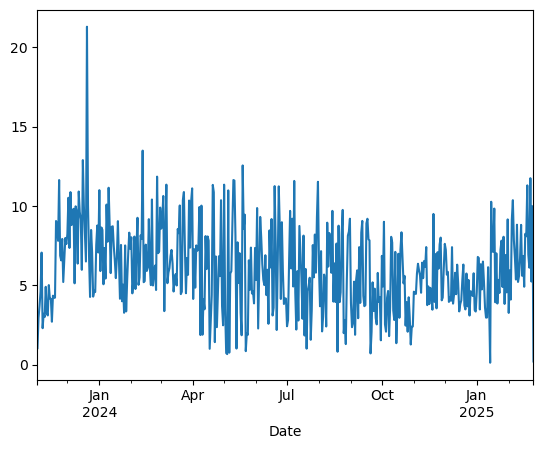

In [26]:
grouped_data_olr.plot()

<Axes: xlabel='Date'>

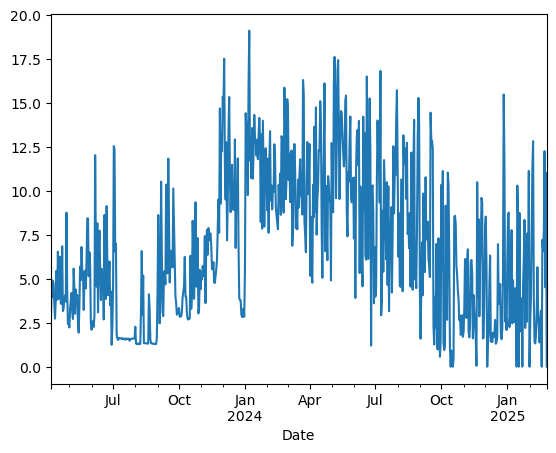

In [27]:
grouped_data_1mc.plot()